In [1]:
from zipfile import ZipFile  # ✅ Correct class name

dataset = 'C:/Users/bosss/Downloads/archive (3).zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')


The dataset is extracted


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['.ipynb_checkpoints', 'with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [4]:
without_mask_files = os.listdir('data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['.ipynb_checkpoints', 'with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [5]:
print("Number of images with mask",len(with_mask_files))
print("Number of images without mask",len(without_mask_files))

Number of images with mask 3726
Number of images without mask 3828


##creating labels for the two class

with_mask --->1 

with_out mask ---->0



In [6]:
#creating the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [7]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


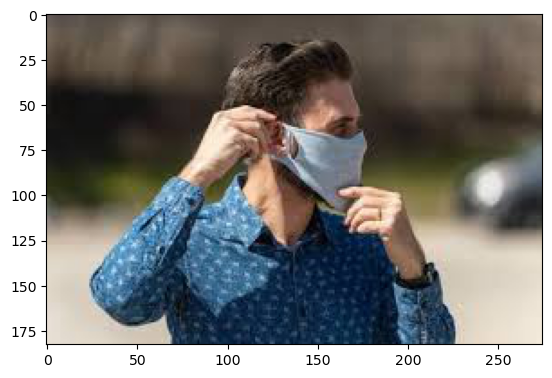

In [9]:
# Displaying wit mask image
img = mpimg.imread('data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

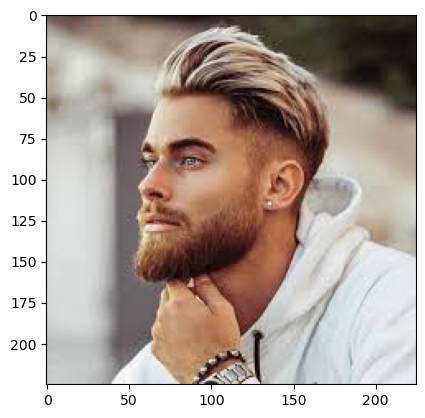

In [10]:
# Displaying wit mask image
img = mpimg.imread('data/without_mask/without_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1 resize the image
2 Convert the images to numpy array


In [11]:
# Convert the images to numpy array+

import os
import numpy as np
from PIL import Image

# Define dataset paths
with_mask_path = 'data/with_mask'
without_mask_path = 'data/without_mask'

# Get list of image filenames (ensure only valid image files are included)
with_mask_files = [f for f in os.listdir(with_mask_path) if f.endswith(('jpg', 'png', 'jpeg'))]
without_mask_files = [f for f in os.listdir(without_mask_path) if f.endswith(('jpg', 'png', 'jpeg'))]

# Initialize lists
data = []


# Process "with mask" images
for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))  # Use os.path.join
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
# Process "without mask" images
for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))  # Use os.path.join
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    



C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)

list

In [13]:
len(data)

7553

In [14]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [15]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [16]:
type(X)

numpy.ndarray

In [17]:
type(Y)

numpy.ndarray

In [18]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [19]:
print(Y)

[1 1 1 ... 0 0 0]


In [20]:
#Train test split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
# Scaling the data 

X_train_scaled = X_train/255

X_test_scaled = X_test/355

In [23]:
X_train[0]

array([[[225, 235, 198],
        [210, 216, 186],
        [189, 188, 169],
        ...,
        [187, 182, 165],
        [181, 174, 151],
        [165, 182, 133]],

       [[224, 228, 217],
        [202, 204, 195],
        [201, 199, 193],
        ...,
        [198, 190, 180],
        [177, 169, 154],
        [158, 182, 141]],

       [[205, 204, 214],
        [221, 219, 227],
        [195, 191, 197],
        ...,
        [183, 173, 174],
        [174, 165, 160],
        [174, 203, 166]],

       ...,

       [[155, 176, 199],
        [160, 180, 197],
        [165, 185, 195],
        ...,
        [ 88,  99,  71],
        [106, 113,  85],
        [ 99, 104,  63]],

       [[150, 177, 197],
        [168, 190, 208],
        [174, 192, 209],
        ...,
        [106, 113,  81],
        [ 99, 103,  67],
        [ 99,  99,  33]],

       [[160, 193, 210],
        [177, 198, 221],
        [175, 189, 214],
        ...,
        [103, 107,  70],
        [ 77,  81,  47],
        [ 99,  94,  63]]

In [24]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

## Building Convolutional Network

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

C:\Users\bosss\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - acc: 0.6744 - loss: 0.8411 - val_acc: 0.9008 - val_loss: 0.2582
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - acc: 0.8780 - loss: 0.3019 - val_acc: 0.9025 - val_loss: 0.2460
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - acc: 0.9046 - loss: 0.2315 - val_acc: 0.9273 - val_loss: 0.2581
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - acc: 0.9277 - loss: 0.2004 - val_acc: 0.9322 - val_loss: 0.2125
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 239ms/step - acc: 0.9387 - loss: 0.1488 - val_acc: 0.9372 - val_loss: 0.1830


## Model Evaluation

In [29]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test_accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - acc: 0.9347 - loss: 0.1743
Test_accuracy =  0.9358041286468506


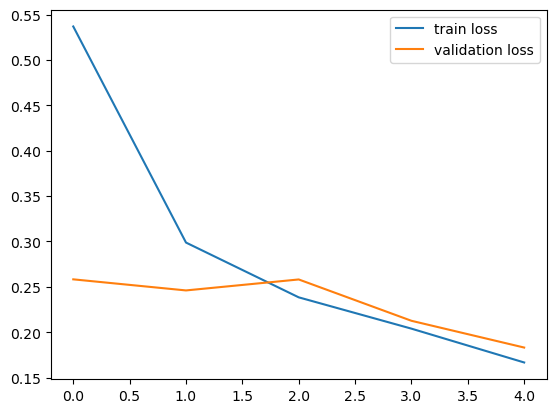

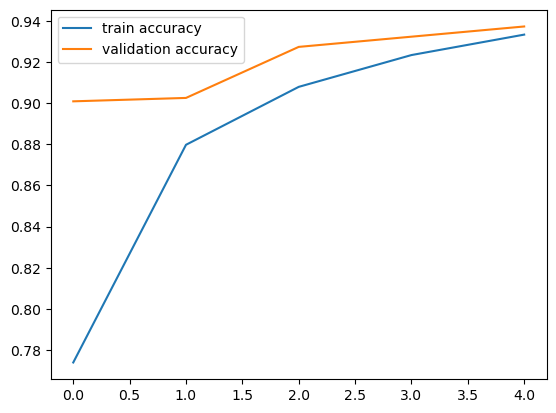

In [30]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: data/with_mask/with_mask_1002.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
[[0.40666783 0.5933322 ]]
1
The person in the image is wearing mask


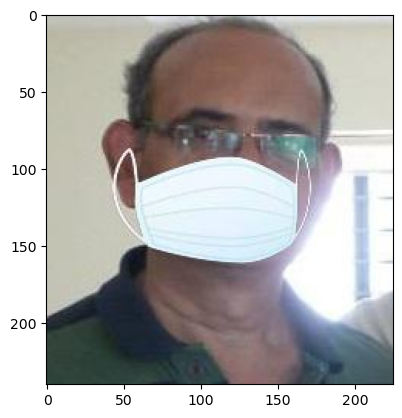

In [31]:
input_image_path = input("Path of the image to be predicted:")

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))


input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print("The person in the image is wearing mask")

else:
  print("The person in image is not wearing mask")